# External modules

In [1]:
library(tidyverse)
library(readr)
library(DescTools)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Internal functions

In [2]:
path <- ".."

xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_nlargest_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima_with_indexes.R"))

xfun::in_dir(dir = path, expr = source("./src/get_standard_scaled_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_and_standard_scaled_data.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_modes.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_modes.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_gev_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_ns_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_ns_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/get_ns_gev_model_normalized_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/get_several_ns_gev_model_normalized_parameters.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_non_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_non_stationary_gev_mixture_model_quantile.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_estimate_non_stationary_gev_mixture_model_quantile.R"))


Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:DescTools’:

    MAE, RMSE


The following object is masked from ‘package:purrr’:

    lift




In [3]:
options(repr.plot.width=19, repr.plot.height=12)

# Data

In [5]:
data <- xfun::in_dir(dir = path, expr = read.csv(file = "./03_application_rain/pluie.csv", sep = ","))

In [6]:
str(data)

'data.frame':	14623 obs. of  1 variable:
 $ x: num  0 0 0 0 0 0 0 0 0 0 ...


In [7]:
x_raw <- data$x

# Data description

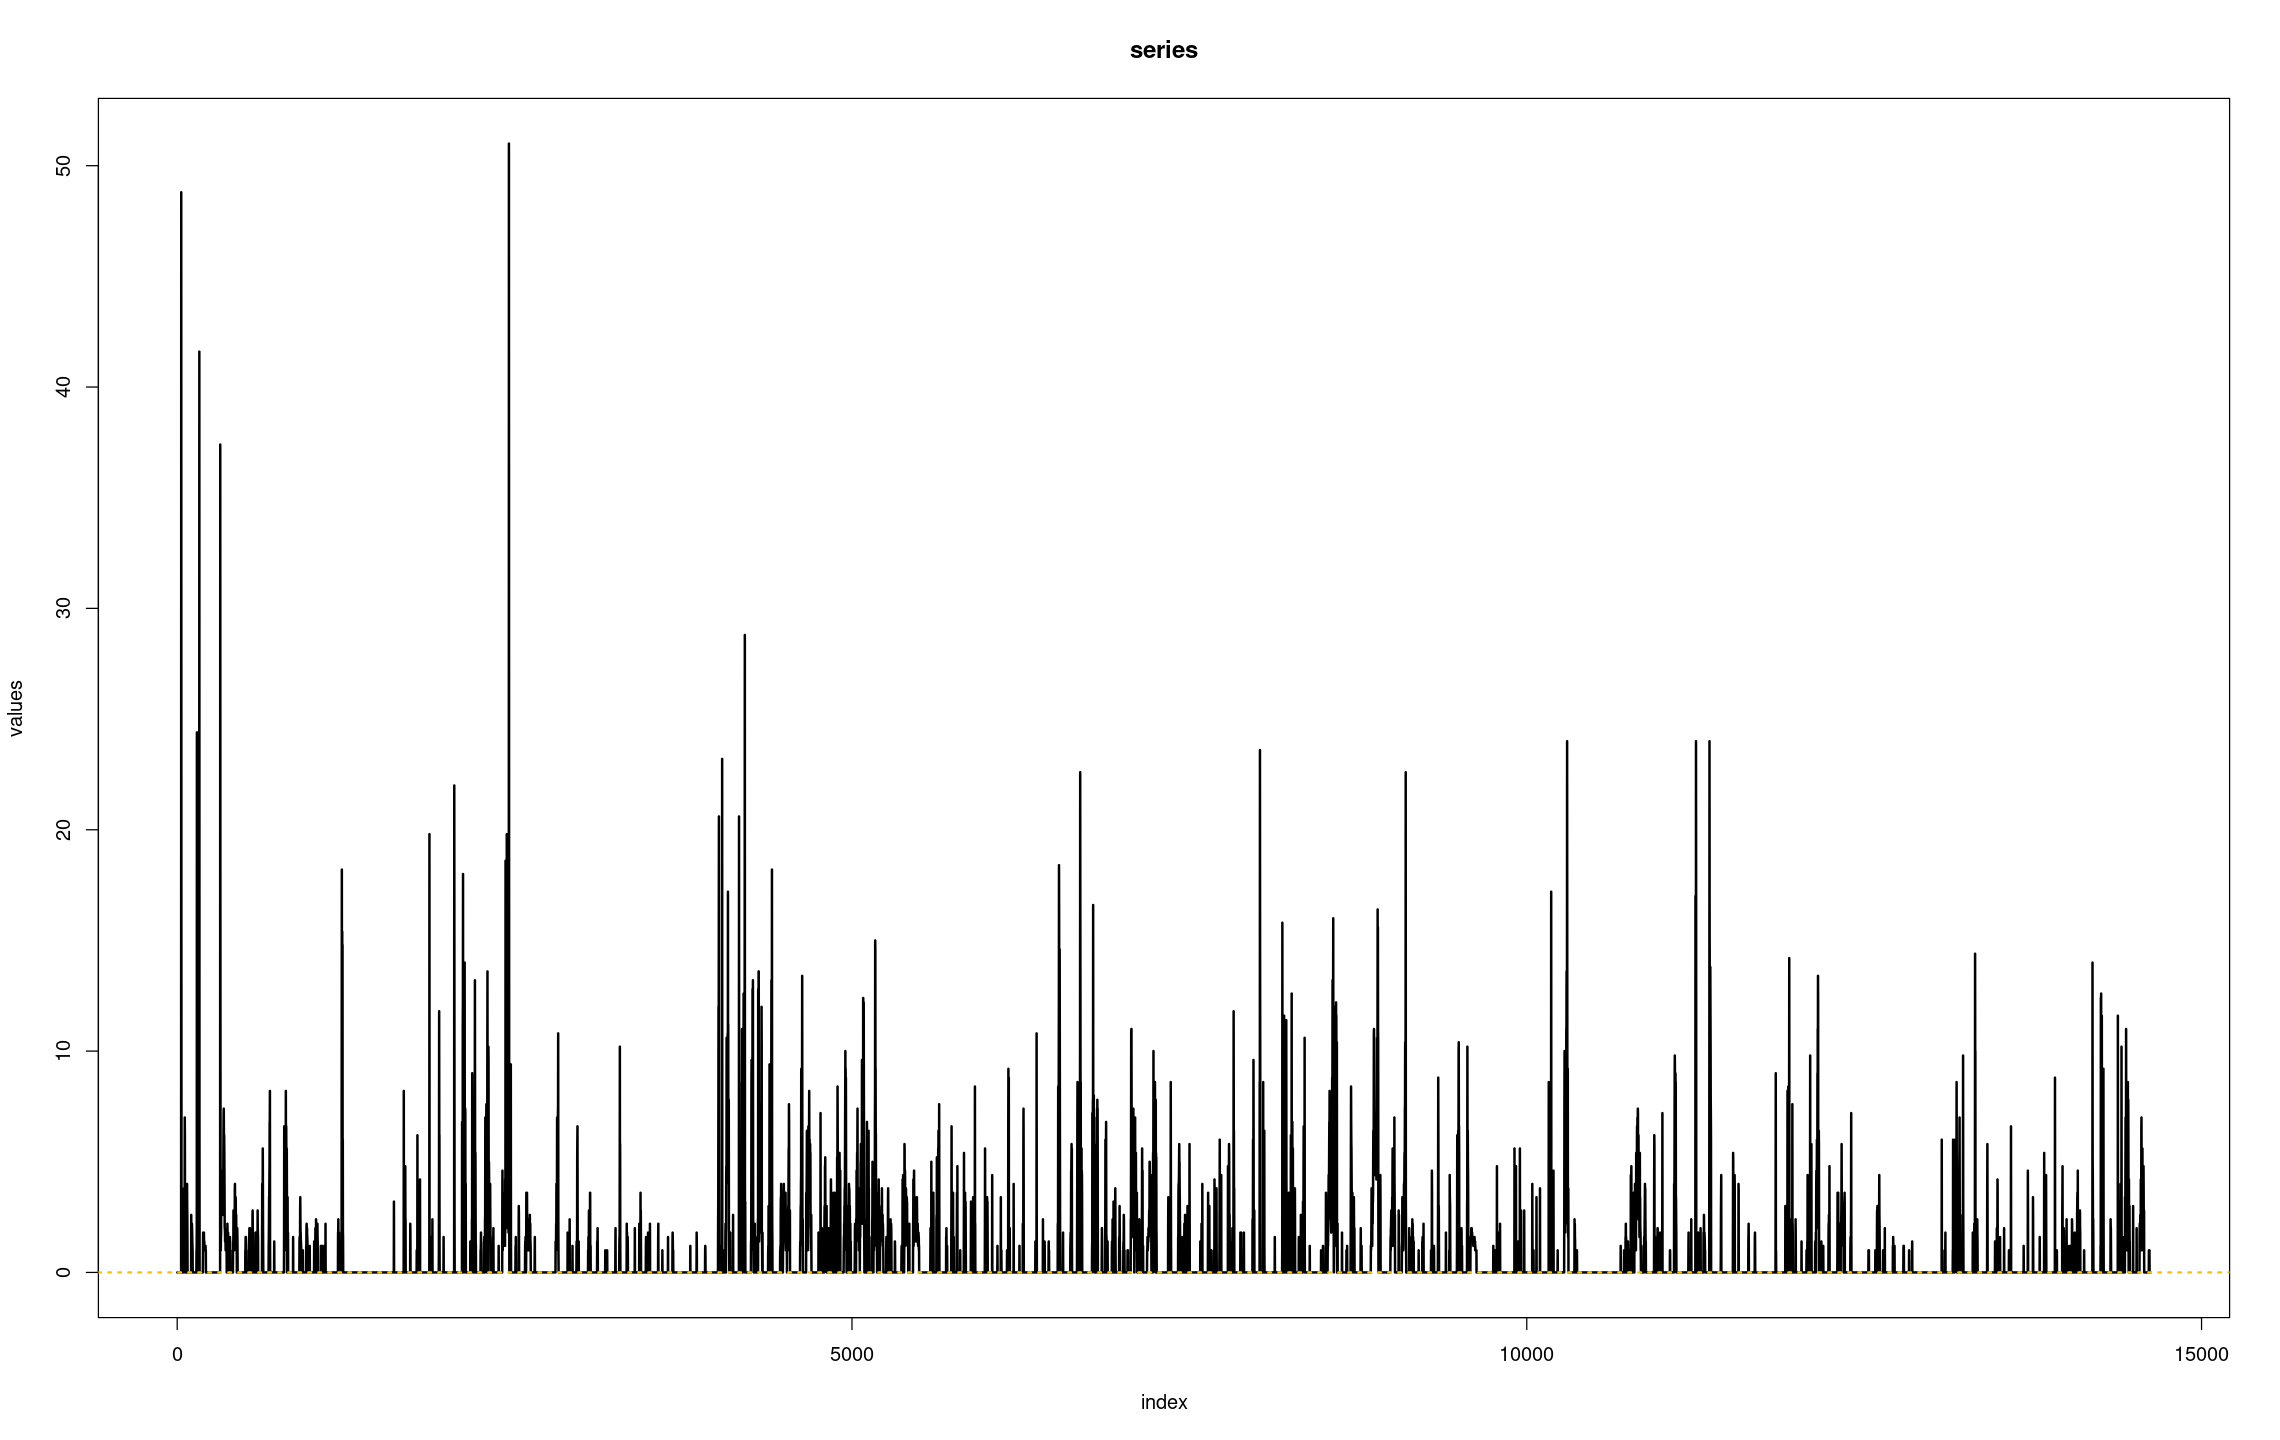

In [8]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x_raw, 
     type = "l", 
     lwd = 2, 
     ylab = "values", 
     xlab = "index",
    main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)


In [9]:
x <- x_raw

------------------------------------------------------------------------------ 
x (numeric)

  length       n    NAs  unique      0s  mean  meanCI'
  14'623  14'623      0      98  11'768  0.69    0.66
          100.0%   0.0%           80.5%          0.72
                                                     
     .05     .10    .25  median     .75   .90     .95
    0.00    0.00   0.00    0.00    0.00  2.20    4.20
                                                     
   range      sd  vcoef     mad     IQR  skew    kurt
   51.00    2.10   3.05    0.00    0.00  6.65   82.88
                                                     
lowest : 0.0 (11'768), 1.0 (329), 1.2 (237), 1.4 (216), 1.6 (190)
highest: 28.8, 37.4, 41.6, 48.8, 51.0

heap(?): remarkable frequency (80.5%) for the mode(s) (= 0)

' 95%-CI (classic)


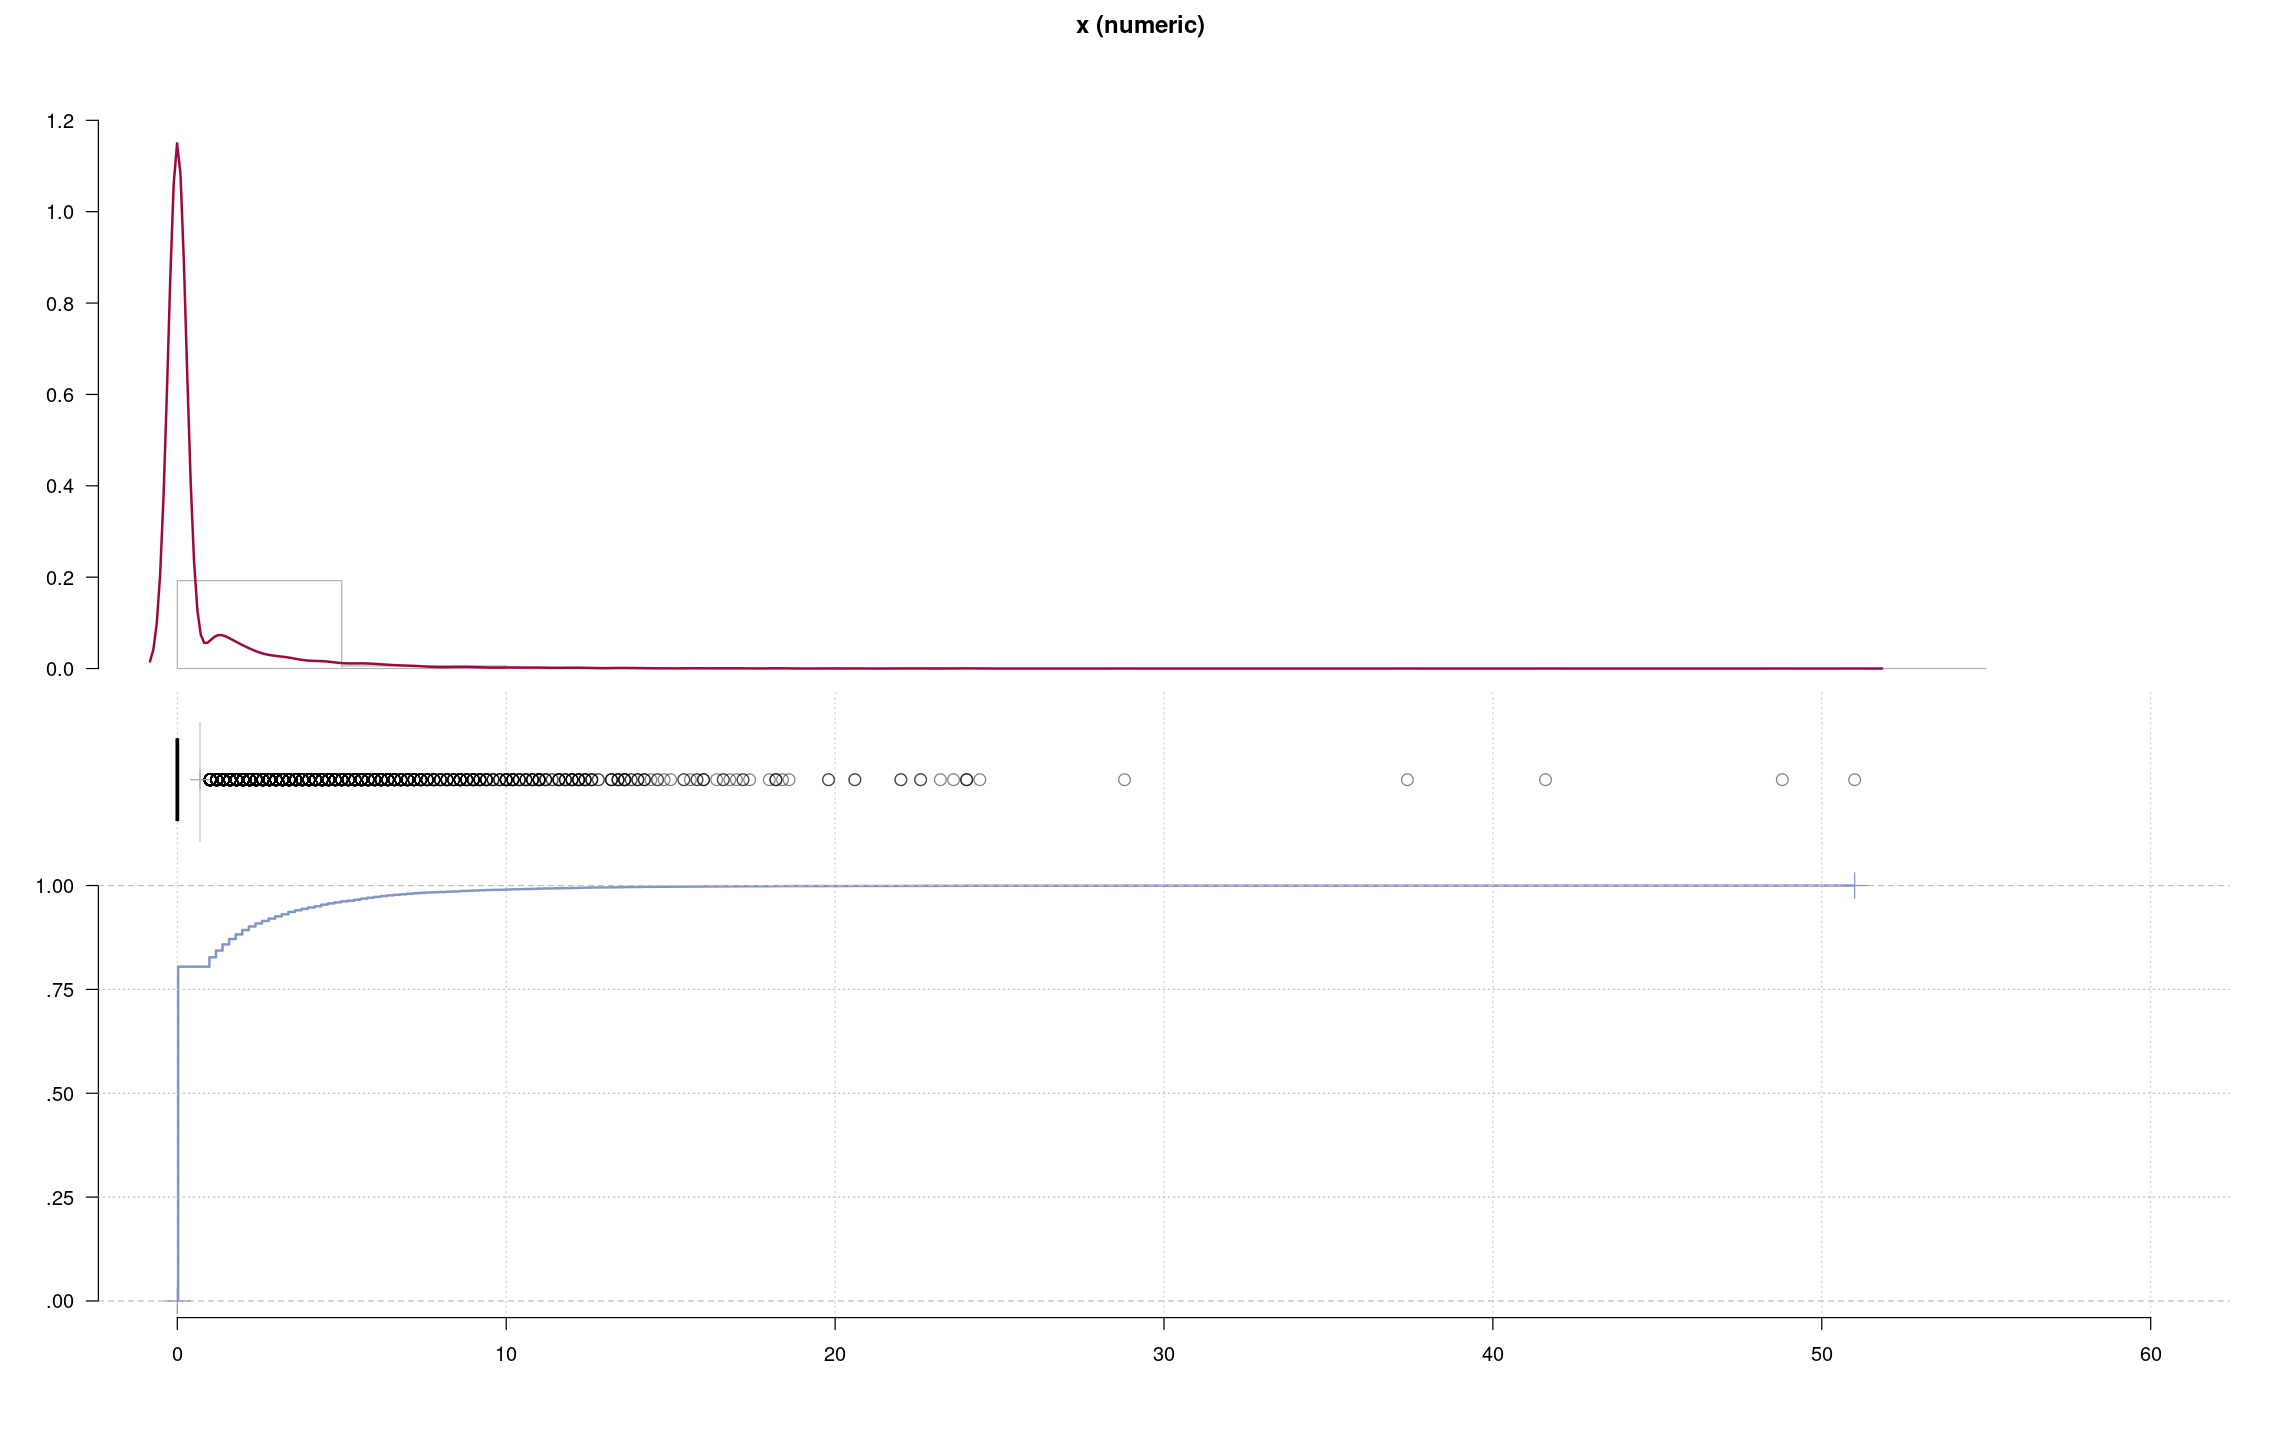

In [10]:
options(repr.plot.width=19, repr.plot.height=12)

Desc(x)

In [11]:
x <- x_raw[!is.na(x_raw)]
n <- length(x)

summary(x)

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
 0.0000000  0.0000000  0.0000000  0.6891746  0.0000000 51.0000000 

In [12]:
# options(repr.plot.width=19, repr.plot.height=12)
# 
# nlargest <- 3000
# y <- extract_nlargest_sample(x, n = nlargest)
# Desc(y)

# EVA: Stationary case

## Estimation

In [34]:
minimum_block_size <- find_minimum_block_size(x, threshold = mean(x))

print(minimum_block_size)

[1] 378


In [35]:
maximum_block_size <- find_block_size_associated_with_given_number_of_blocks(x, m = 50)

print(maximum_block_size)

[1] 292


In [36]:
maxima <- extract_block_maxima(x, block_size = minimum_block_size)

print(min(maxima))

[1] 3.6


In [37]:
print(median(x))

[1] 0


In [38]:
print(calculate_mode(x))

[1] -0.007869986399


In [39]:
candidate_block_sizes <- get_candidate_block_sizes(x, threshold = 0.089, m = 50)

print(candidate_block_sizes)

[1] 378 379 380 381 382 383 384


In [27]:
gev_mixture_model_object <- fit_stationary_gev_mixture_model(x = x,
                                                             nlargest = Inf,
                                                             block_sizes = NULL,
                                                             minimum_nblocks = 50,
                                                             threshold = 0,
                                                             confidence_level = 0.95,
                                                             use_extremal_index = TRUE,
                                                             use_uniform_prior = TRUE,
                                                             method = c("MLE", "GMLE", "Lmoments")[1])

In [28]:
print(names(gev_mixture_model_object))

 [1] "threshold"                            
 [2] "candidate_block_sizes"                
 [3] "equivalent_block_sizes"               
 [4] "unequivalent_block_sizes"             
 [5] "selected_block_sizes"                 
 [6] "unselected_block_sizes"               
 [7] "failed_block_sizes"                   
 [8] "use_uniform_prior"                    
 [9] "weights"                              
[10] "frequencies"                          
[11] "use_extremal_index"                   
[12] "extremal_indexes"                     
[13] "negative_log_likelihoods"             
[14] "information_criteria"                 
[15] "unnormalized_gev_parameters_object"   
[16] "normalized_gev_parameters_object"     
[17] "full_normalized_gev_parameters_object"
[18] "partial_data"                         
[19] "all_data"                             
[20] "selected_model_per_obs"               
[21] "selected_gev_models"                  
[22] "several_residuals"                    
[23] "seve

In [29]:
print(gev_mixture_model_object$full_normalized_gev_parameters_object)

         loc_star  scale_star   shape_star
378  -5.997948577 2.825438707 0.1768762654
380  -4.066203471 2.021751500 0.2405301211
381  -3.132203036 1.629144084 0.2873020665
384 -11.409671267 4.459169965 0.1156511856


In [30]:
print(gev_mixture_model_object$weights)

          378           380           381           384 
0.34623655914 0.14193548387 0.42795698925 0.08387096774 


In [31]:
print(which.max(gev_mixture_model_object$weights))

381 
  3 


In [32]:
print(which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 3


In [33]:
print(which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 3


In [34]:
print(which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 4


In [35]:
print(gev_mixture_model_object$information_criteria)

        AIC         BIC 
139725.3916 139839.2469 


In [36]:
print(gev_mixture_model_object$threshold)

[1] 3.4


In [37]:
print(gev_mixture_model_object$equivalent_block_sizes)

[1] 378 379 380 381 382 383 384


In [59]:
print(gev_mixture_model_object$extremal_indexes)

         378          380          381          384 
0.1791012243 0.1791012243 0.1791012243 0.1176538478 


## Diagnostic

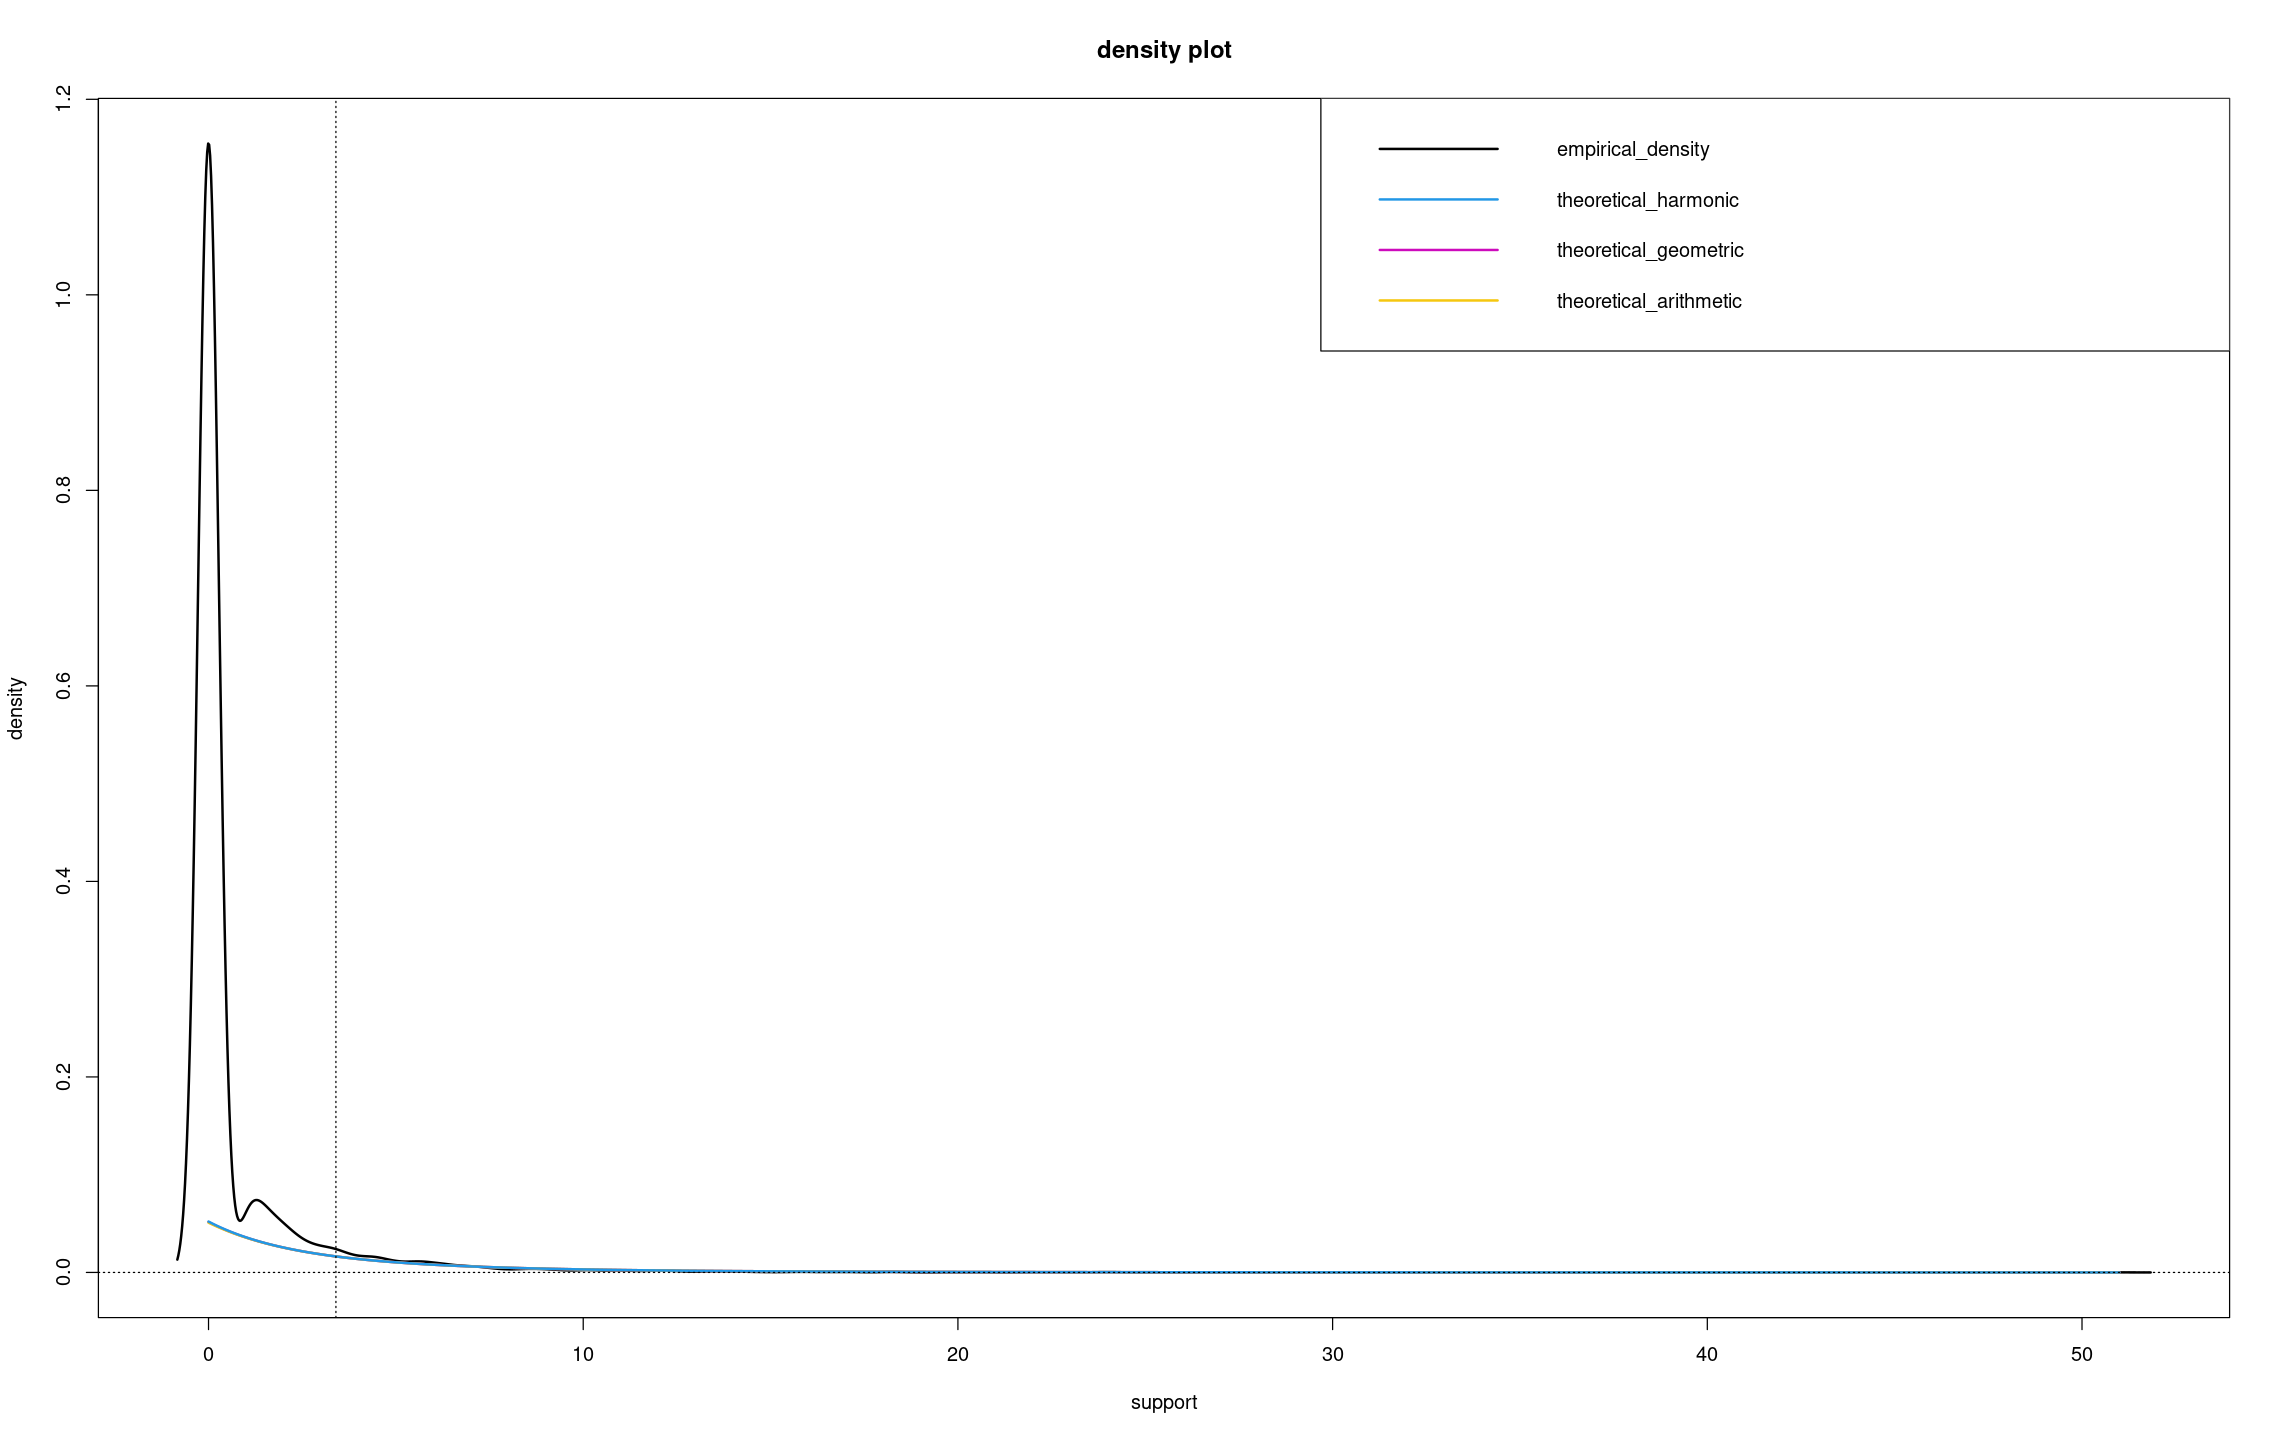

In [38]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = 0,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

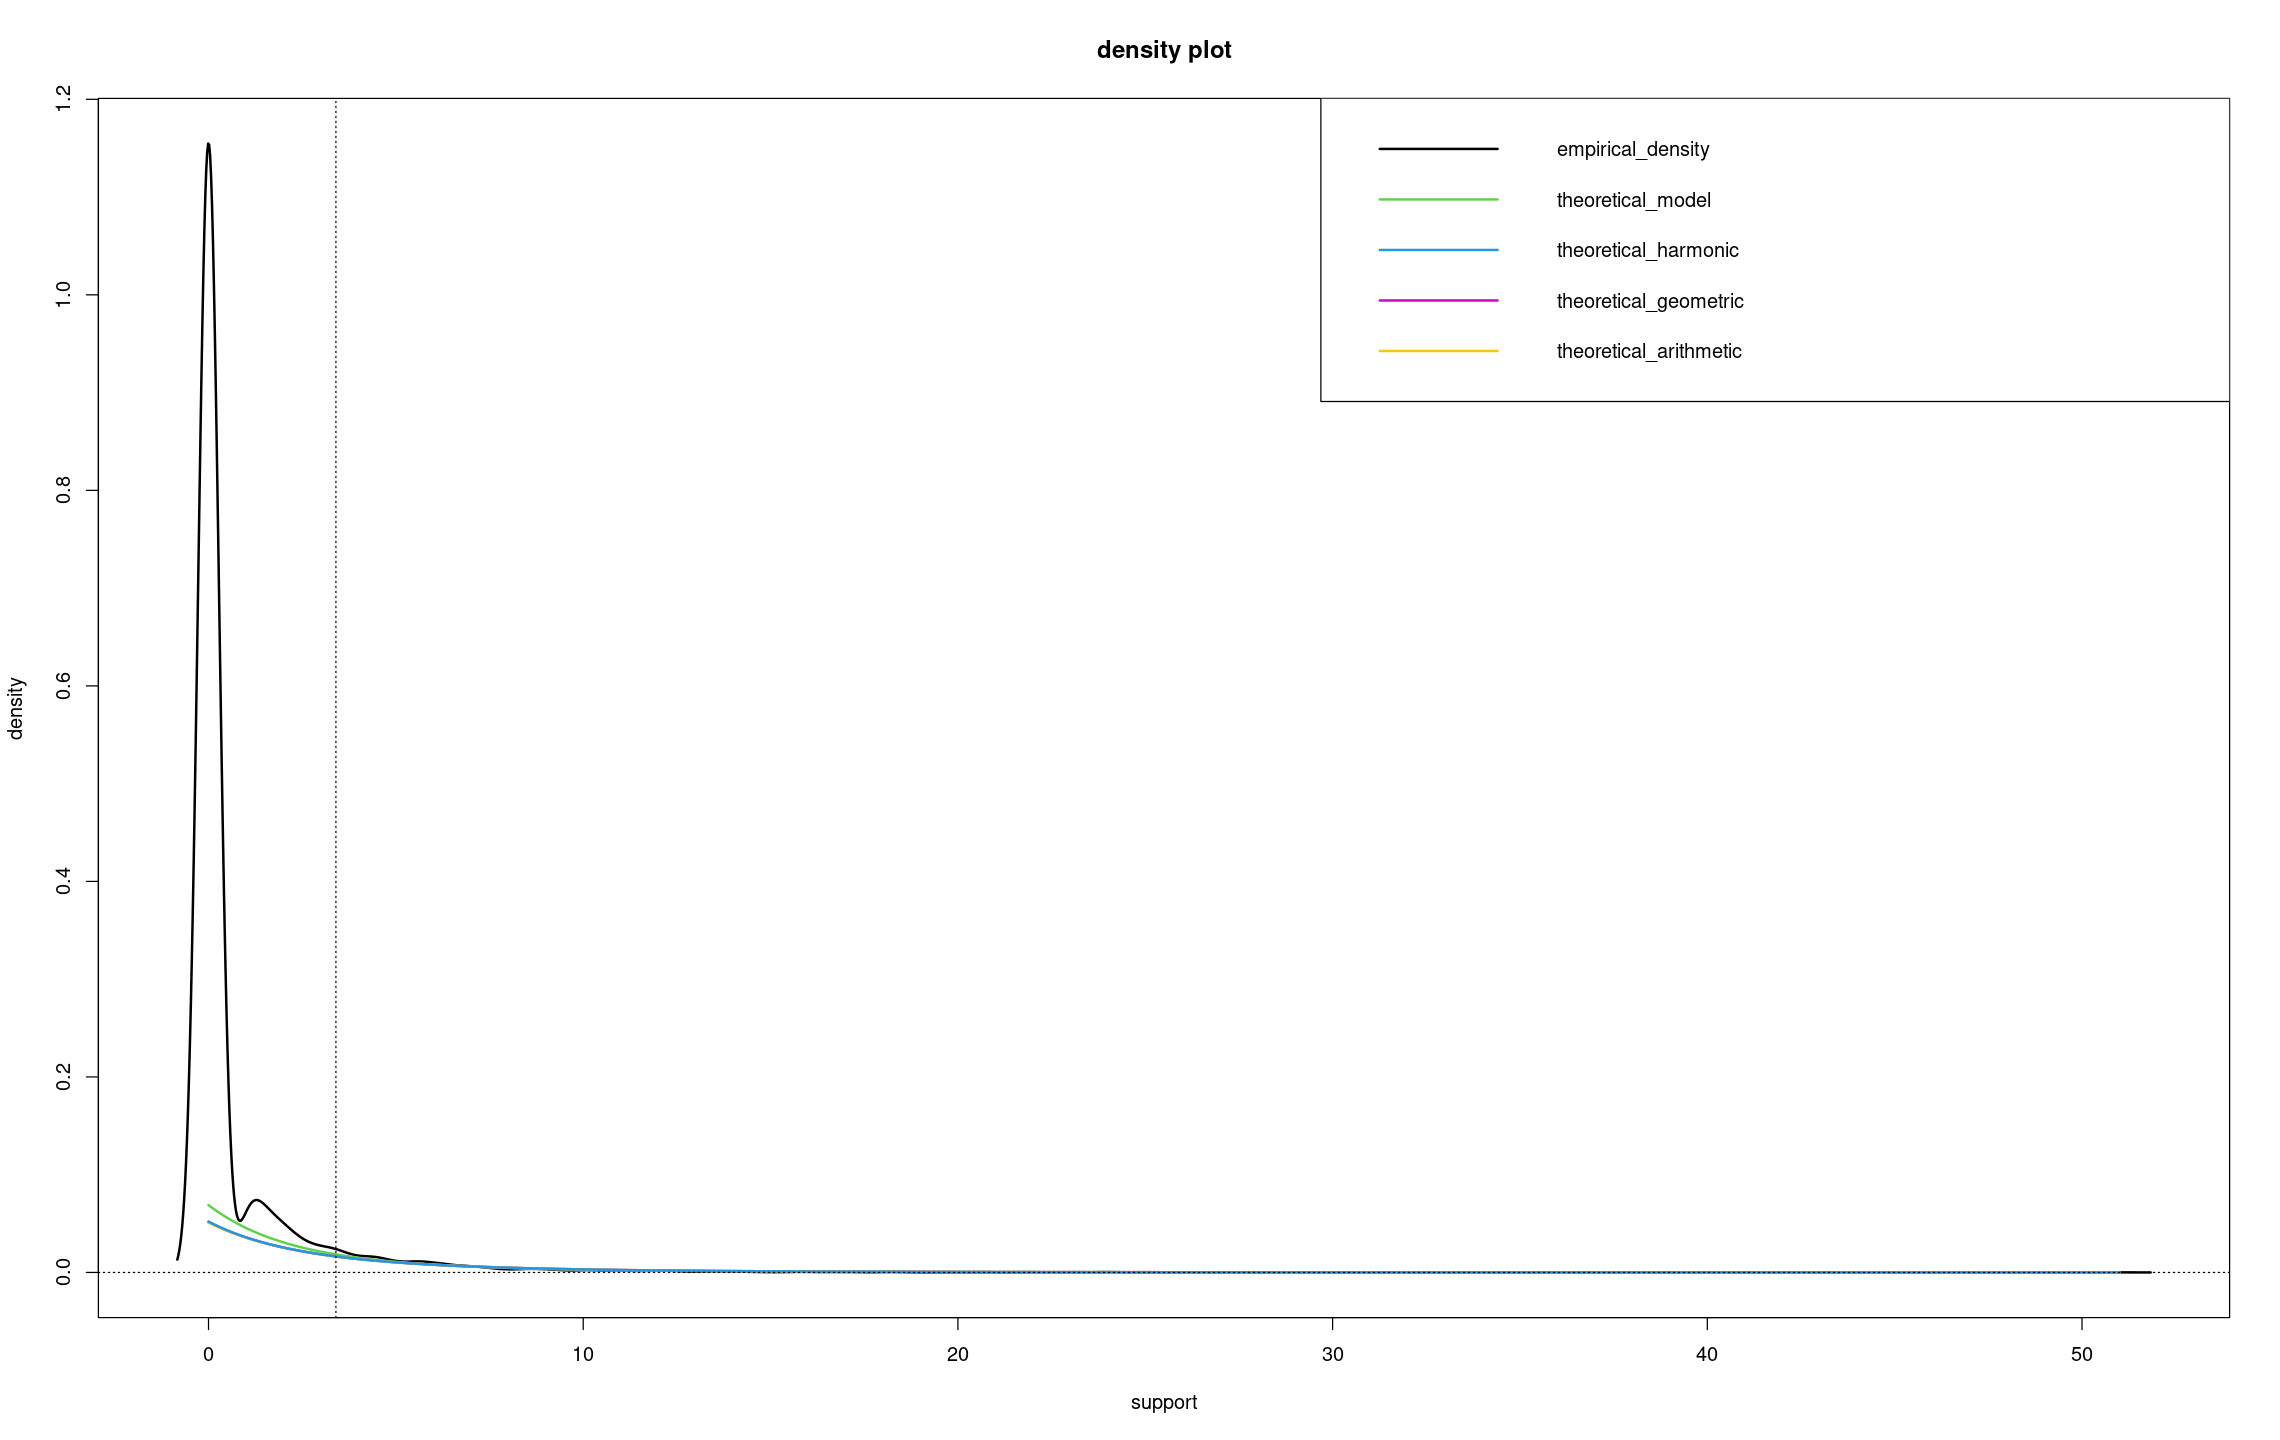

In [39]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.max(gev_mixture_model_object$weights),
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

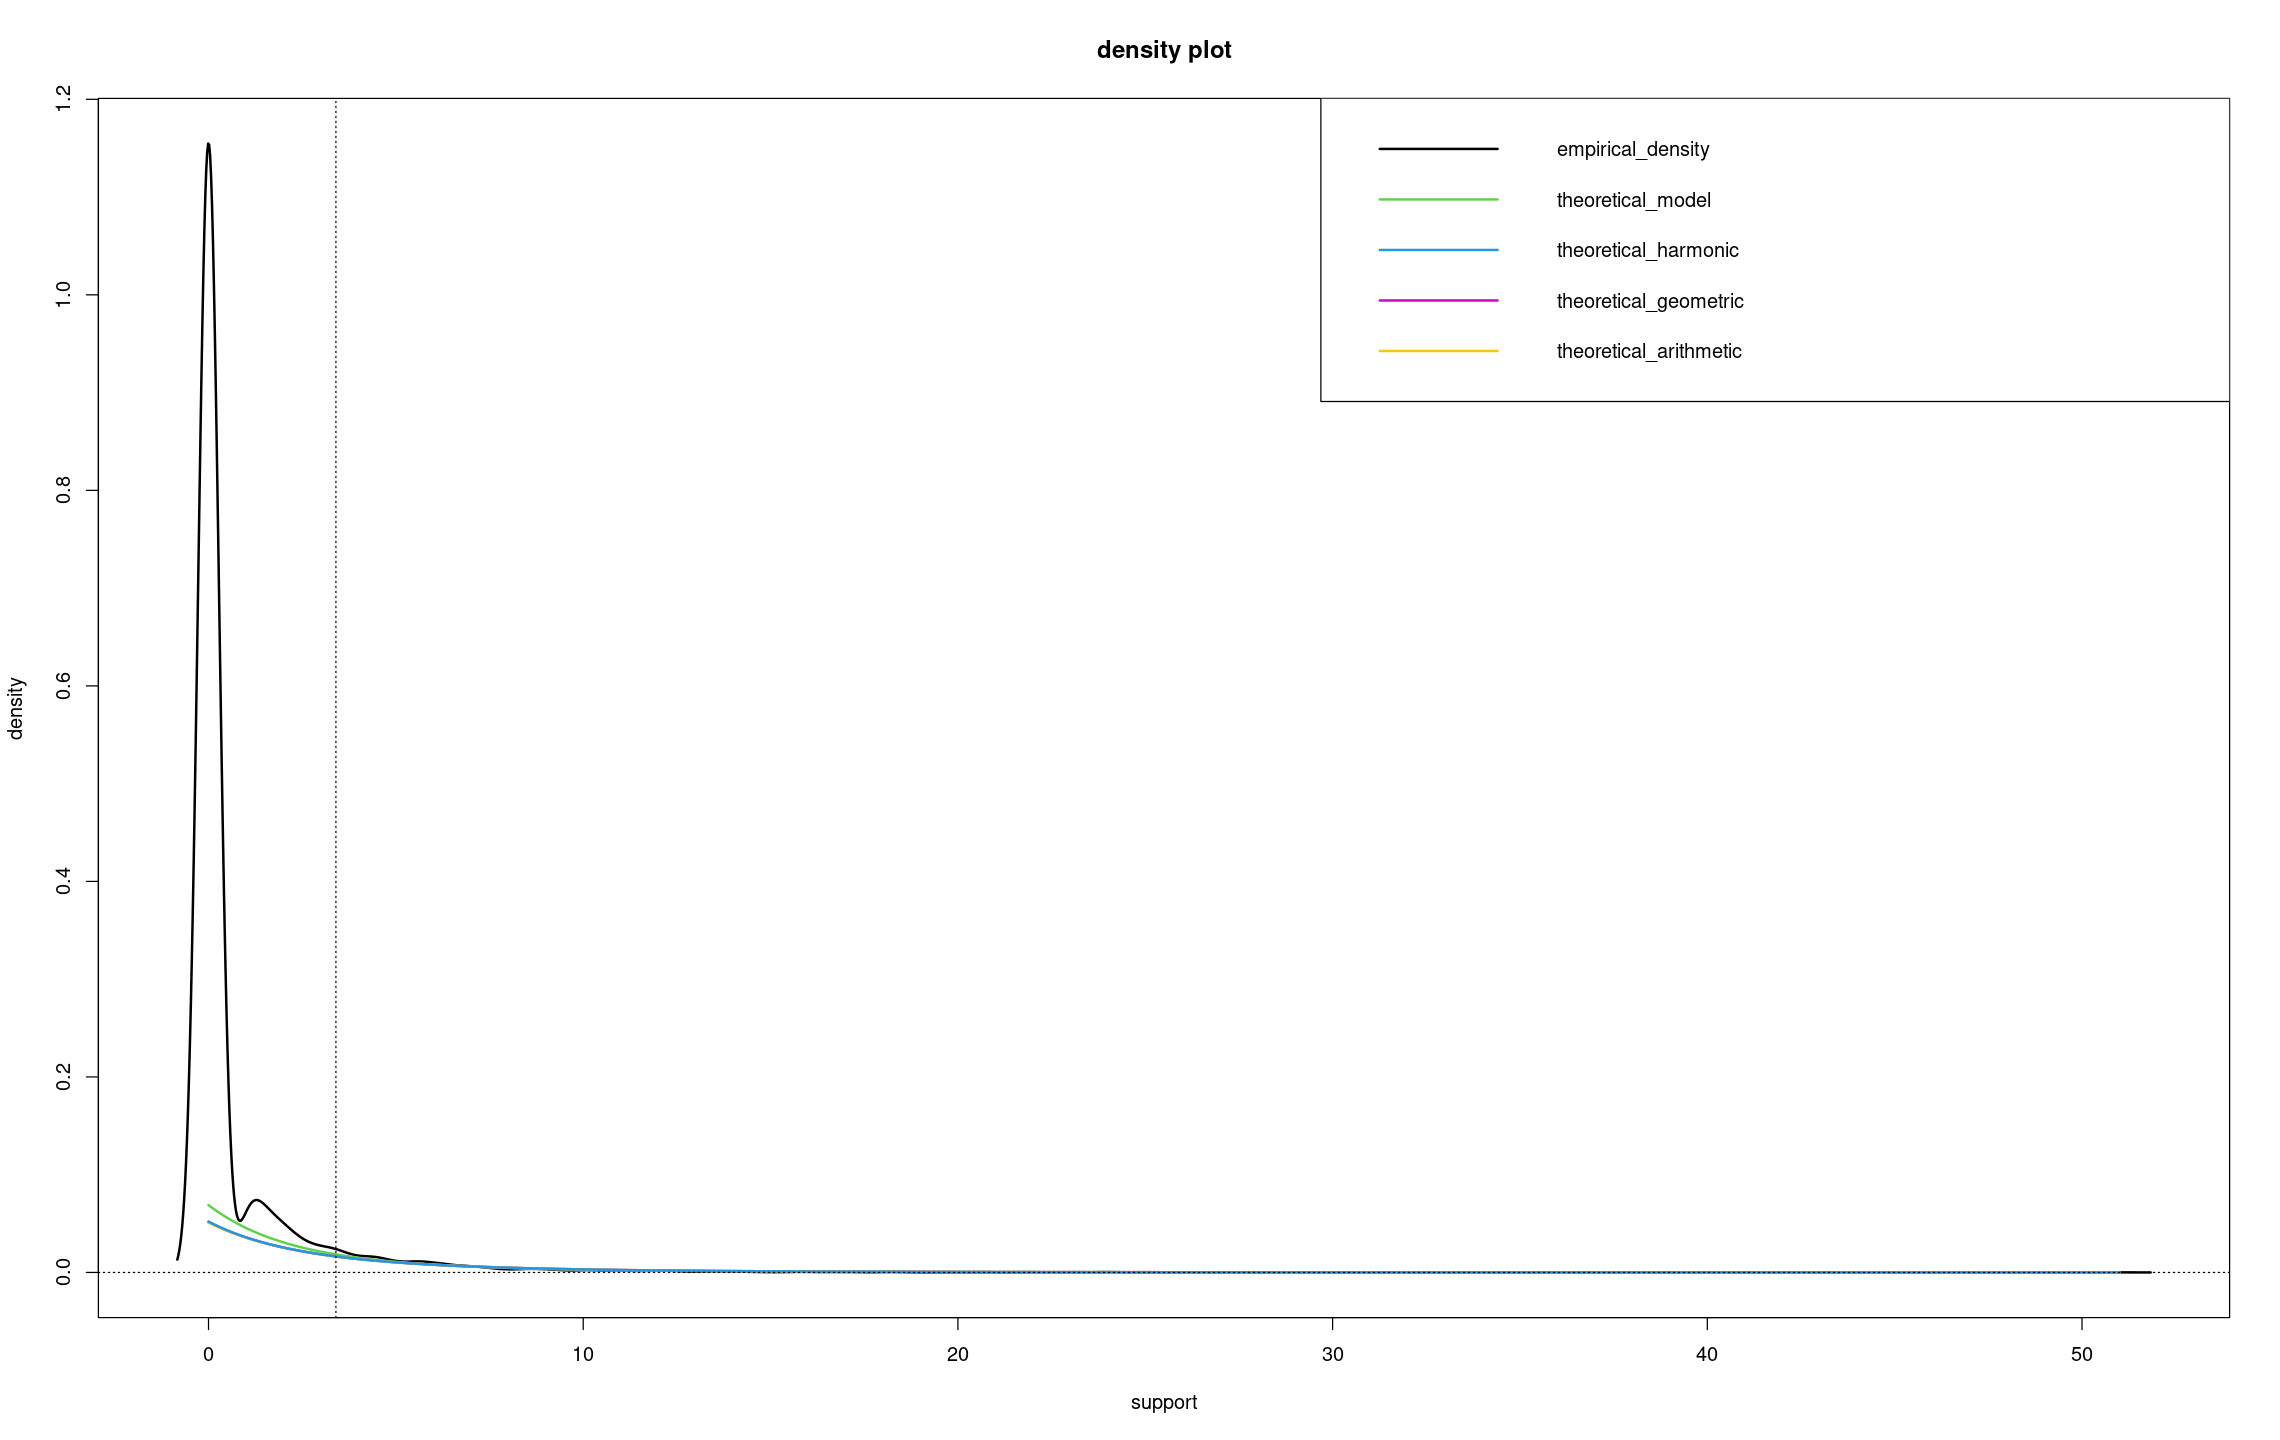

In [40]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star),
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

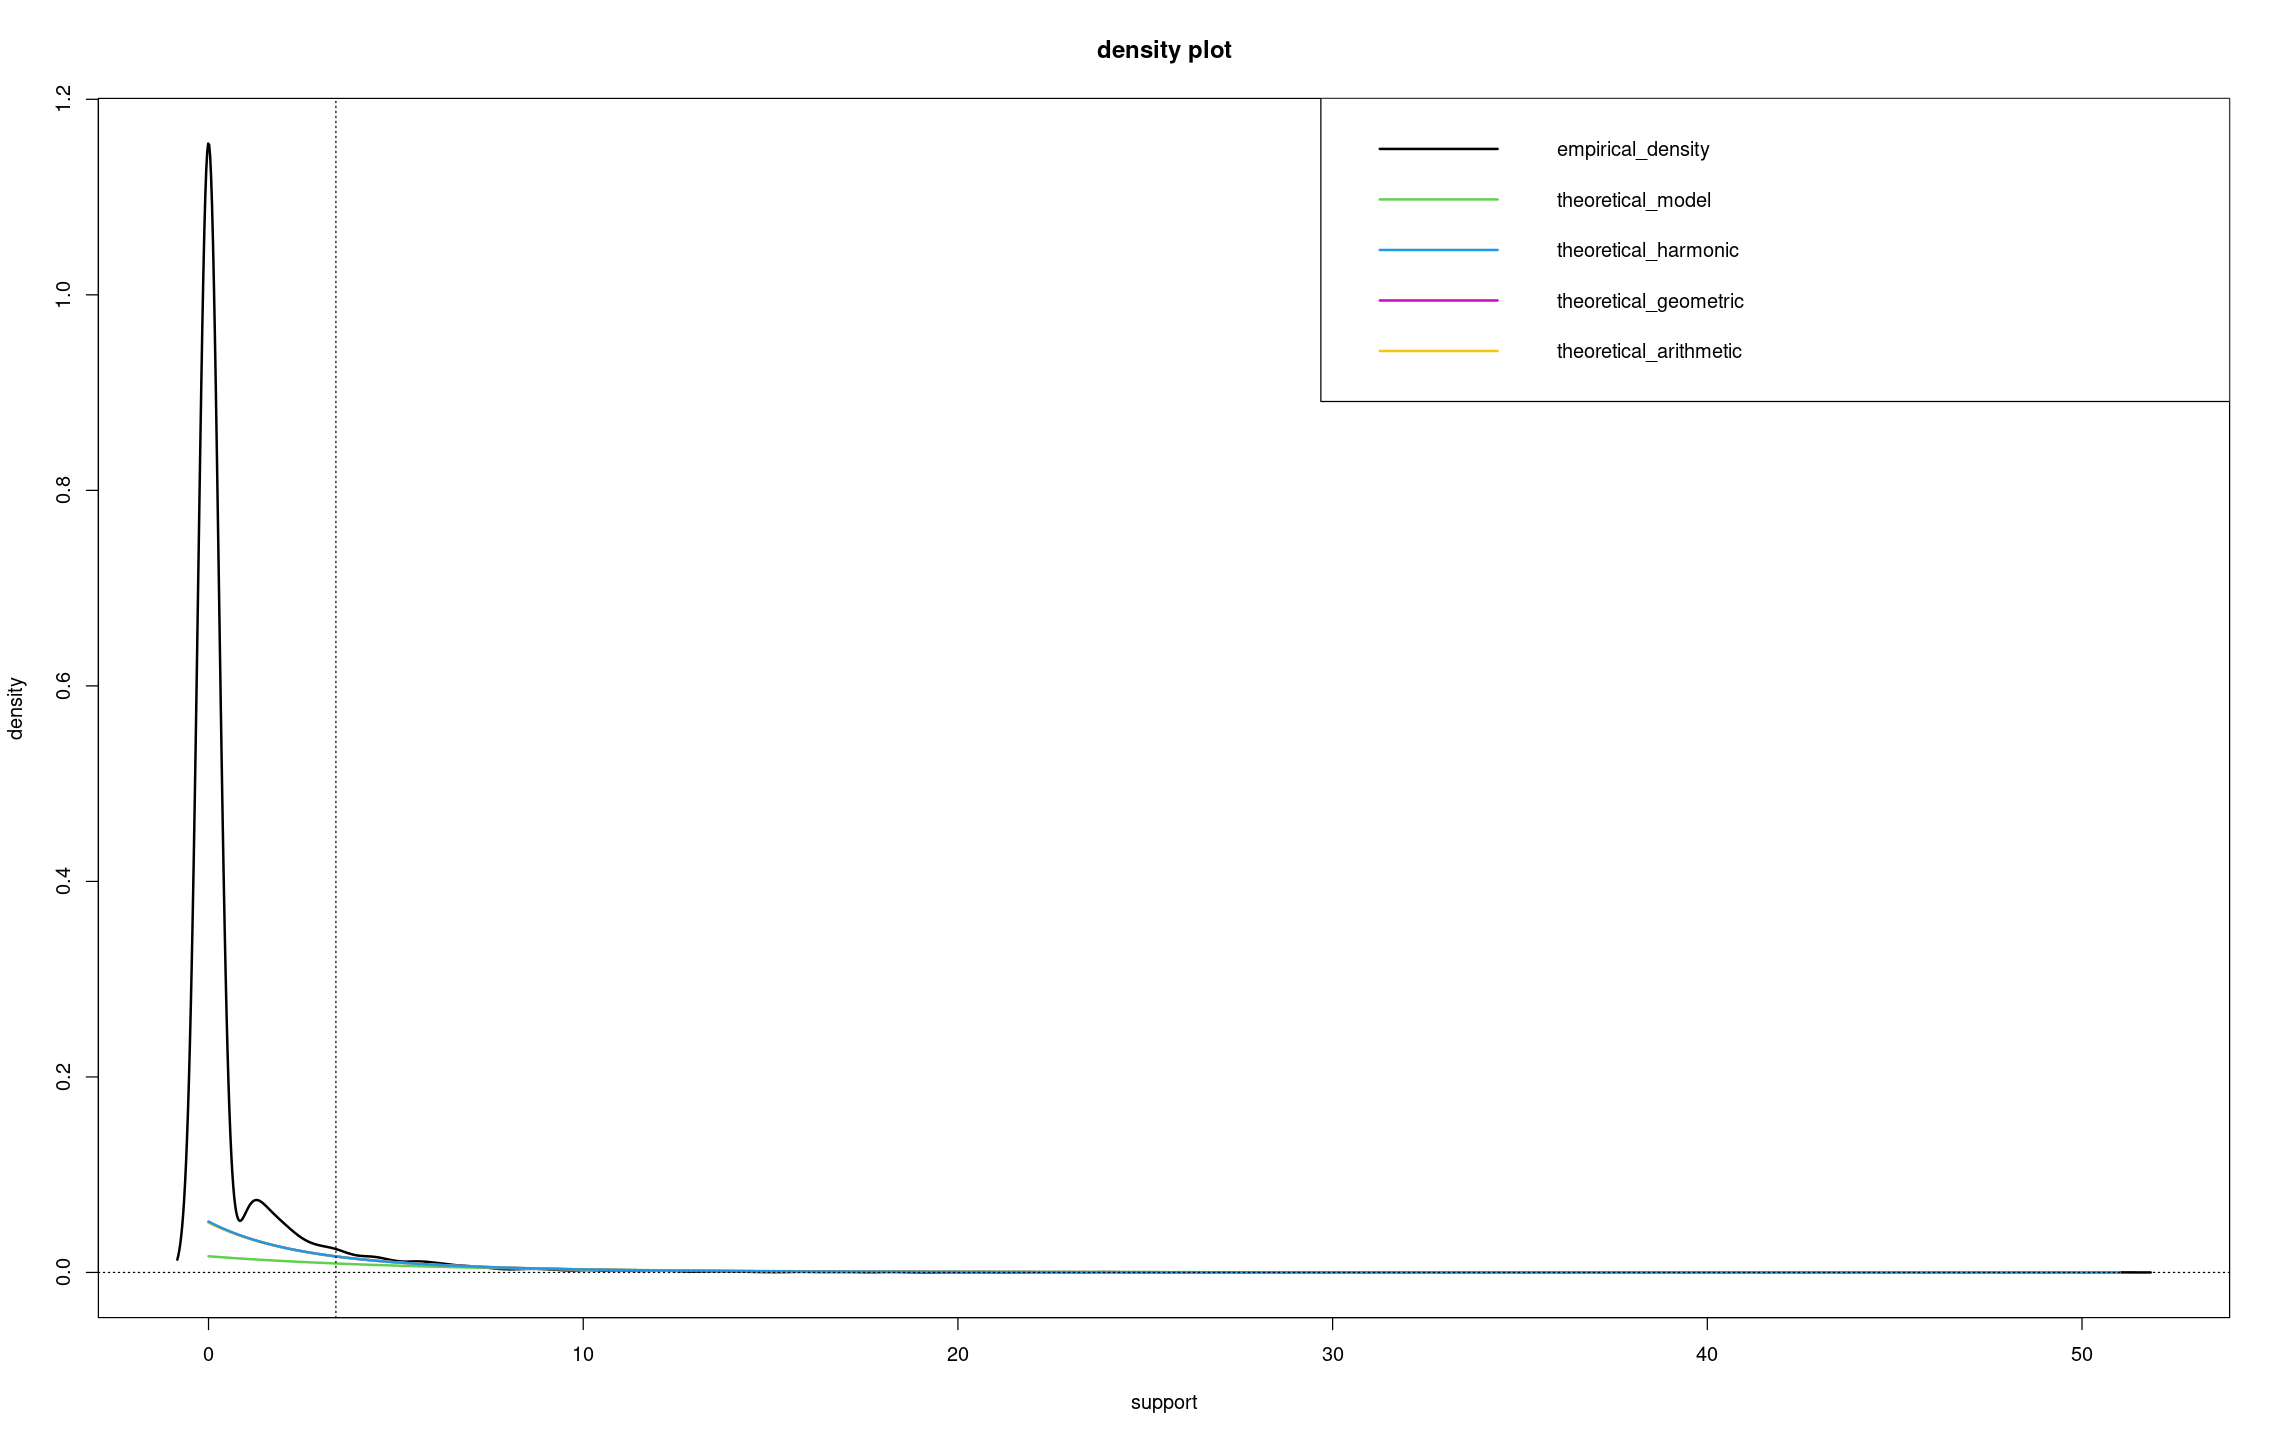

In [41]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star),
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

## Quantiles

In [51]:
m <- 366*10000

In [58]:
alpha <- m^(-1)

alpha

[1] 2.732240437e-07

In [42]:
alpha <- n^(-2)

print(alpha)

[1] 4.6765657e-09


In [43]:
true_quantile <- NULL

print(true_quantile)

NULL


In [53]:
results_geometric <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                    alpha = alpha,
                                                                    do.ci = TRUE,
                                                                    confidence_level = 0.95,
                                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                    iterations = 100)

results_geometric

$quantiles_object
      lower_bound    estimate  upper_bound
378  -353.3885158 209.4155389  772.2195936
380  -637.6161904 306.2155827 1250.0473559
381 -1077.4722422 427.0700447 1931.6123316
384  -239.8408545 171.4333613  582.7075770

$gev_mixture_model_quantile
[1] 344.8410286

$smalest_lower_ci_bound
[1] -1077.472242

$largest_upper_ci_bound
[1] 1931.612332

$quantile_gev_inf
   lower_bound    estimate upper_bound
1 -750.2370631 1170.992987 3092.223037

$quantile_gev_sup
   lower_bound    estimate upper_bound
1 -22.24739345 53.36916017 128.9857138

In [54]:
results_arithmetic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[2],
                                                                     iterations = 100)

results_arithmetic

$quantiles_object
      lower_bound    estimate  upper_bound
378  -353.3885158 209.4155389  772.2195936
380  -637.6161904 306.2155827 1250.0473559
381 -1077.4722422 427.0700447 1931.6123316
384  -239.8408545 171.4333613  582.7075770

$gev_mixture_model_quantile
[1] 344.8410166

$smalest_lower_ci_bound
[1] -1077.472242

$largest_upper_ci_bound
[1] 1931.612332

$quantile_gev_inf
   lower_bound    estimate upper_bound
1 -750.2370631 1170.992987 3092.223037

$quantile_gev_sup
   lower_bound    estimate upper_bound
1 -22.24739345 53.36916017 128.9857138

In [55]:
results_harmonic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[3],
                                                                     iterations = 100)

results_harmonic

$quantiles_object
      lower_bound    estimate  upper_bound
378  -353.3885158 209.4155389  772.2195936
380  -637.6161904 306.2155827 1250.0473559
381 -1077.4722422 427.0700447 1931.6123316
384  -239.8408545 171.4333613  582.7075770

$gev_mixture_model_quantile
[1] 344.8410406

$smalest_lower_ci_bound
[1] -1077.472242

$largest_upper_ci_bound
[1] 1931.612332

$quantile_gev_inf
   lower_bound    estimate upper_bound
1 -750.2370631 1170.992987 3092.223037

$quantile_gev_sup
   lower_bound    estimate upper_bound
1 -22.24739345 53.36916017 128.9857138

In [56]:
options(repr.plot.width=23, repr.plot.height=6)

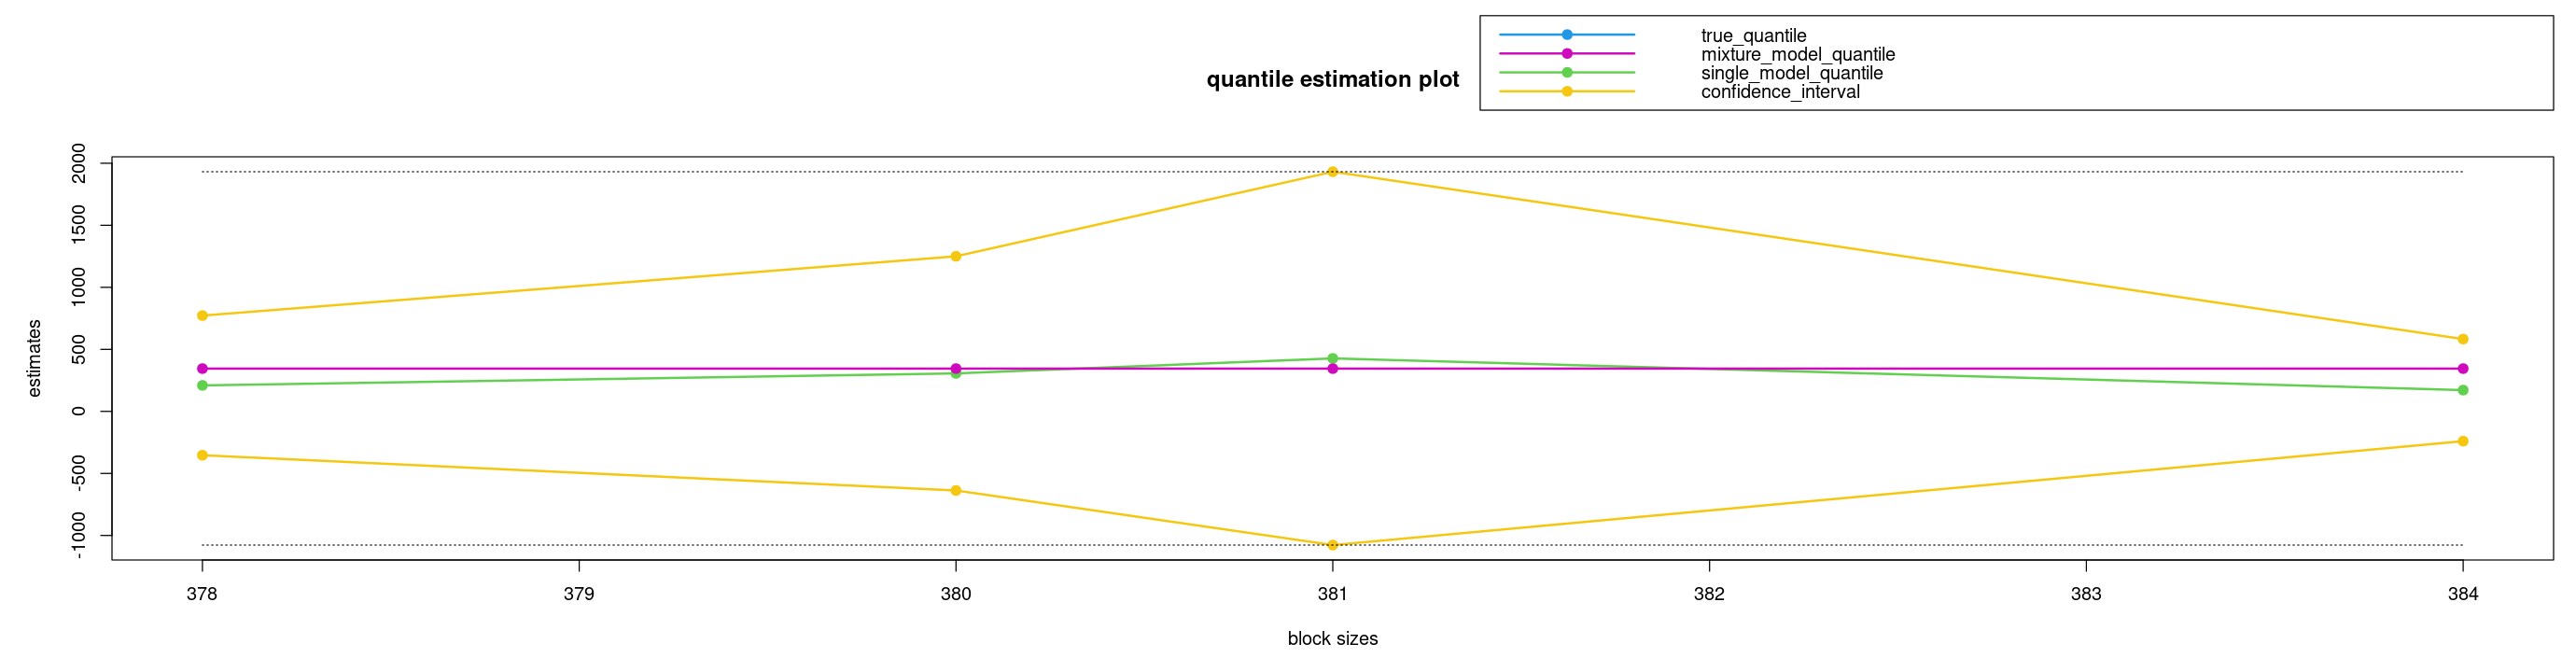

In [57]:
options(repr.plot.width=23, repr.plot.height=6)

plot_estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                    alpha = alpha,
                                                    true_quantile = NULL,
                                                    do.ci = TRUE,
                                                    confidence_level = 0.95,
                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                    iterations = 100,
                                                    xlab = "block sizes",
                                                    ylab = "estimates",
                                                    main = "quantile estimation plot",
                                                    legend_position = "topright")